In [ ]:
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

In [ ]:
#cd drive/MyDrive/18668

/content/drive/MyDrive/18668


In [1]:
import matplotlib.pyplot as plt

In [4]:
import json

def load_file(file_path):
    """
    :param file_path: path to the json file
    :return: an array in which each entry is tuple [review, classification label]
    """
    with open(file_path) as json_file:
        raw_data = json.load(json_file)
        return convert_data(raw_data)

def convert_data(raw_data):
    data = []
    for elem in raw_data:
        data.append([elem["comment"], elem["label"]])
    return data

In [5]:
import pandas as pd

data = load_file("json/Bug_tt.json")
df = pd.DataFrame(data, columns = ['text', 'label'])
df.head()

,text,label
0,"Besides the occasional crash, this is an amazi...",Bug
1,This could be a great app if it was predictabl...,Bug
2,I can't open since the last 2 updates Pop-ups ...,Bug
3,Use to love this app but it's not working afte...,Bug
4,"Urrrrm\tAfter my third re installing, it final...",Bug


<AxesSubplot: xlabel='label'>

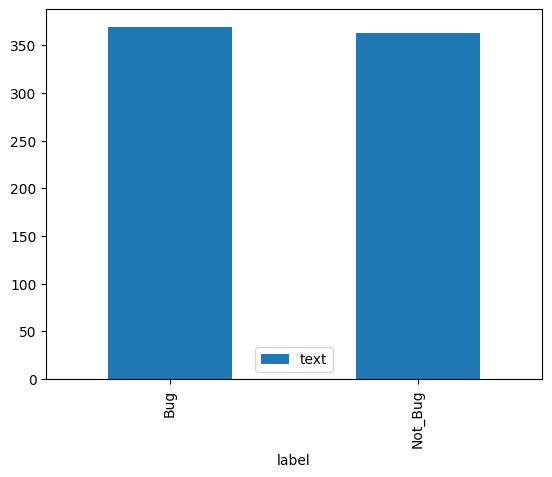

In [6]:
df.groupby('label').nunique().plot(kind='bar')

In [7]:
df.loc[3]['text']

"Use to love this app but it's not working after new update. Pages won't scroll up or down...none of the different tabs work...it's frozen! Please fix ASAP!!!"

In [8]:
# Text cleaning
df['text_parsed_1'] = df['text'].str.replace("\r", " ")
df['text_parsed_1'] = df['text_parsed_1'].str.replace("\n", " ")
df['text_parsed_1'] = df['text_parsed_1'].str.replace('"', '')
df['text_parsed_1'] = df['text_parsed_1'].str.lower()
df.loc[3]['text_parsed_1']

"use to love this app but it's not working after new update. pages won't scroll up or down...none of the different tabs work...it's frozen! please fix asap!!!"

In [9]:
!pip install contractions
import contractions
print(df.loc[3]['text_parsed_1'])

for index, row in df.iterrows():
    df['text_parsed_1'][index] = contractions.fix(row['text_parsed_1'])

print(df.loc[3]['text_parsed_1'])

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.1-py3-none-any.whl (287 kB)
  Using cached pyahocorasick-1.4.4-cp38-cp38-win_amd64.whl (39 kB)
use to love this app but it's not working after new update. pages won't scroll up or down...none of the different tabs work...it's frozen! please fix asap!!!
use to love this app but it is not working after new update. pages will not scroll up or down...none of the different tabs work...it is frozen! please fix as soon as possible!!!


In [10]:
punctuation_signs = list("?:!.,;")

df['text_parsed_2'] = df['text_parsed_1']

for punct_sign in punctuation_signs:
    df['text_parsed_2'] = df['text_parsed_2'].str.replace(punct_sign, '', regex=True)

df['text_parsed_2'] = df['text_parsed_2'].str.replace("'s", "", regex=True)
df.loc[3]['text_parsed_2']

'use to love this app but it is not working after new update pages will not scroll up or downnone of the different tabs workit is frozen please fix as soon as possible'

In [12]:
! pip install nltk
import nltk
nltk.download('omw-1.4')
# Downloading wordnet from NLTK
nltk.download('wordnet')

     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ------------------------------------- 267.7/267.7 kB 17.2 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Amos\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amos\AppData\Roaming\nltk_data...


True

In [13]:
from nltk.stem import WordNetLemmatizer
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()
df.head()

,text,label,text_parsed_1,text_parsed_2
0,"Besides the occasional crash, this is an amazi...",Bug,"besides the occasional crash, this is an amazi...",besides the occasional crash this is an amazin...
1,This could be a great app if it was predictabl...,Bug,this could be a great app if it was predictabl...,this could be a great app if it was predictabl...
2,I can't open since the last 2 updates Pop-ups ...,Bug,i cannot open since the last 2 updates pop-ups...,i cannot open since the last 2 updates pop-ups...
3,Use to love this app but it's not working afte...,Bug,use to love this app but it is not working aft...,use to love this app but it is not working aft...
4,"Urrrrm\tAfter my third re installing, it final...",Bug,"urrrrm\tafter my third re installing, it final...",urrrrm\tafter my third re installing it finall...


In [14]:
nrows = len(df)
lemmatized_text_list = []

for row in range(nrows):
    # Create an empty list which will contain the lemmatized words
    lemmatized_list = []
    # Save the text and its words into an object
    text = df.loc[row]['text_parsed_2']
    text_words = text.split(" ")
    # Iterate through every word to lemmatize
    for word in text_words:
      lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [15]:
df['text_parsed_3'] = lemmatized_text_list
print(df.loc[3]['text'])
print(df.loc[3]['text_parsed_3'])

Use to love this app but it's not working after new update. Pages won't scroll up or down...none of the different tabs work...it's frozen! Please fix ASAP!!!
use to love this app but it be not work after new update page will not scroll up or downnone of the different tabs workit be freeze please fix as soon as possible


In [16]:
from nltk.corpus import stopwords
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
import re

example = "me eating a meal"
word = "me"
# The regular expression is:
regex = r'\b' + word + r'\b'  # we need to build it like that to work properly: space + stopword + space
re.sub(regex, "StopWord", example)

'StopWord eating a meal'

In [19]:
df['text_parsed_4'] = df['text_parsed_3']
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['text_parsed_4'] = df['text_parsed_4'].str.replace(regex_stopword, '', regex=True)

print(df.loc[3]['text'])
df['text_parsed_4'] = df['text_parsed_4'].replace(r'\s+', ' ', regex=True)
print(df.loc[3]['text_parsed_4'])

Use to love this app but it's not working after new update. Pages won't scroll up or down...none of the different tabs work...it's frozen! Please fix ASAP!!!
use love app work new update page scroll downnone different tabs workit freeze please fix soon possible


In [20]:
df.head()

,text,label,text_parsed_1,text_parsed_2,text_parsed_3,text_parsed_4
0,"Besides the occasional crash, this is an amazi...",Bug,"besides the occasional crash, this is an amazi...",besides the occasional crash this is an amazin...,besides the occasional crash this be an amaze ...,besides occasional crash amaze product tons po...
1,This could be a great app if it was predictabl...,Bug,this could be a great app if it was predictabl...,this could be a great app if it was predictabl...,this could be a great app if it be predictable...,could great app predictable full bug unpredic...
2,I can't open since the last 2 updates Pop-ups ...,Bug,i cannot open since the last 2 updates pop-ups...,i cannot open since the last 2 updates pop-ups...,i cannot open since the last 2 update pop-ups ...,cannot open since last 2 update pop-ups go cr...
3,Use to love this app but it's not working afte...,Bug,use to love this app but it is not working aft...,use to love this app but it is not working aft...,use to love this app but it be not work after ...,use love app work new update page scroll downn...
4,"Urrrrm\tAfter my third re installing, it final...",Bug,"urrrrm\tafter my third re installing, it final...",urrrrm\tafter my third re installing it finall...,urrrrm\tafter my third re instal it finally ha...,urrrrm third instal finally scenery hand black...


In [21]:
# remove the intermediate columns
list_columns = ["text", "label", "text_parsed_4"]
df = df[list_columns]
df = df.rename(columns={'text_parsed_4': 'text_parsed'})
df.head()

,text,label,text_parsed
0,"Besides the occasional crash, this is an amazi...",Bug,besides occasional crash amaze product tons po...
1,This could be a great app if it was predictabl...,Bug,could great app predictable full bug unpredic...
2,I can't open since the last 2 updates Pop-ups ...,Bug,cannot open since last 2 update pop-ups go cr...
3,Use to love this app but it's not working afte...,Bug,use love app work new update page scroll downn...
4,"Urrrrm\tAfter my third re installing, it final...",Bug,urrrrm third instal finally scenery hand black...


In [22]:
label_codes = {
  'Bug': 1,
  'Not_Bug': 0
}

# label mapping
df['label_code'] = df['label']
df = df.replace({'label_code':label_codes})
df.head()

,text,label,text_parsed,label_code
0,"Besides the occasional crash, this is an amazi...",Bug,besides occasional crash amaze product tons po...,1
1,This could be a great app if it was predictabl...,Bug,could great app predictable full bug unpredic...,1
2,I can't open since the last 2 updates Pop-ups ...,Bug,cannot open since last 2 update pop-ups go cr...,1
3,Use to love this app but it's not working afte...,Bug,use love app work new update page scroll downn...,1
4,"Urrrrm\tAfter my third re installing, it final...",Bug,urrrrm third instal finally scenery hand black...,1


In [23]:
# train - test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_parsed'], df['label_code'], test_size=0.15, random_state=42)

In [24]:
# Text representation
from sklearn.feature_extraction.text import TfidfVectorizer
# Parameter election
ngram_range = (1,2)
min_df = 0.01 # ignore terms that appear in less than 1% of the documents
max_df = 0.8 # ignore terms that appear in more than 80% of the documents
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',ngram_range=ngram_range,
                        stop_words=None,lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(629, 274)
(111, 274)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

svc_0 =svm.SVC(random_state=42)
svc_0.fit(features_train, labels_train)
print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [26]:
# C
C = [.0001, .001,  .1, 1]
# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]
# degree
degree = [1, 2, 3, 4, 5]
# kernel
kernel = ['linear', 'rbf', 'poly']
# probability
probability = [True]
# Create the random grid
random_grid = {'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree,'probability': probability}

pprint(random_grid)

{'C': [0.0001, 0.001, 0.1, 1],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [27]:
# First create the base model to tune
svc = svm.SVC(random_state=42)
# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc, param_distributions=random_grid, n_iter=50, scoring='accuracy',cv=3,verbose=1,random_state=42)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=50,
                   param_distributions={'C': [0.0001, 0.001, 0.1, 1],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=42, scoring='accuracy', verbose=1)

In [28]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 1}

The mean accuracy of a model with these hyperparameters is:
0.7646920331130858


In [29]:
best_svc = random_search.best_estimator_
# fit the model
best_svc.fit(features_train, labels_train)

SVC(C=1, gamma=0.1, probability=True, random_state=42)

In [30]:
print("Training accuracy: ")
print("Tuned model: ", accuracy_score(labels_train, best_svc.predict(features_train)))
print("Default model: ", accuracy_score(labels_train, svc_0.predict(features_train)))
print("\n\nTest accuracy: ")
print("Tuned model: ", accuracy_score(labels_test, best_svc.predict(features_test)))
print("Default model: ", accuracy_score(labels_test, svc_0.predict(features_test)))

Training accuracy: 
Tuned model:  0.8394276629570747
Default model:  0.9761526232114467


Test accuracy: 
Tuned model:  0.7477477477477478
Default model:  0.7567567567567568


In [31]:
svc_pred = best_svc.predict(features_test)

# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        55
           1       0.79      0.68      0.73        56

    accuracy                           0.75       111
   macro avg       0.75      0.75      0.75       111
weighted avg       0.75      0.75      0.75       111



     -------------------------------------- 288.2/288.2 kB 4.5 MB/s eta 0:00:00


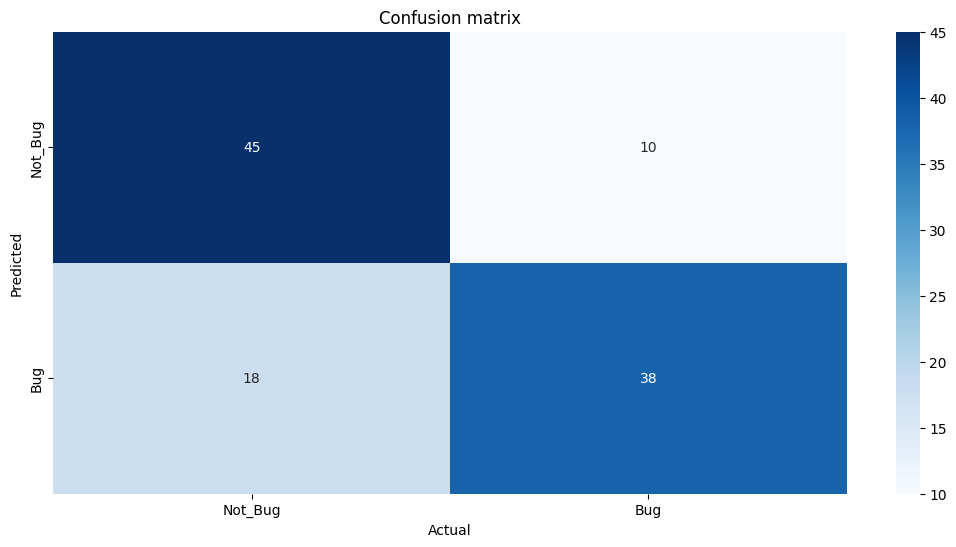

In [33]:
! pip install seaborn
import seaborn as sns
# Confusion matrix
aux_df = df[['label', 'label_code']].drop_duplicates().sort_values('label_code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, annot=True, xticklabels=aux_df['label'].values, yticklabels=aux_df['label'].values, cmap="Blues")

plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [34]:
print("Default Model")
print("Accuracy: " + str(accuracy_score(labels_test, svc_0.predict(features_test))))
print("F1 score: "+ str(f1_score(labels_test, svc_0.predict(features_test))))
 
print("\nRandom Model")
print("Accuracy: " + str(accuracy_score(labels_test, best_svc.predict(features_test))))
print("F1 score: "+ str(f1_score(labels_test, best_svc.predict(features_test))))

Default Model
Accuracy: 0.7567567567567568
F1 score: 0.7476635514018691

Random Model
Accuracy: 0.7477477477477478
F1 score: 0.7307692307692307
